# Importing lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Checkpoint 1: Data Cleaning 1

### Loading the companies and rounds data into two data frames companies and rounds2 respectively.

In [2]:
#checking encoding type 
import chardet
with open("companies.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(70000))
result

{'encoding': 'Windows-1252', 'confidence': 0.728697646758984, 'language': ''}

In [3]:
# using encoding ISO-8859-1 some unknown symbols was there in the data so using ANSI by hit and trial.
companies= pd.read_csv("companies.csv",encoding='ANSI')
rounds2= pd.read_csv("rounds2.csv",encoding='ANSI')

In [4]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Holiday-Propane,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [5]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [6]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [7]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
rounds2.company_permalink.describe()

count                       114949
unique                       90247
top       /ORGANIZATION/SOLARFLARE
freq                            10
Name: company_permalink, dtype: object

### Converting Unique ID of company to lower case in both the data frame to make consistency

In [9]:
companies['permalink']= companies['permalink'].str.lower()
rounds2['company_permalink']= rounds2['company_permalink'].str.lower()

### unique companies in companies

In [10]:
len(companies['permalink'].unique())

66368

### unique companies in rounds

In [11]:
len(rounds2['company_permalink'].unique())

66368

### Companies in the rounds2 file which are not present in companies

In [12]:
set(rounds2['company_permalink'].unique()).difference(set(companies.permalink.unique()))

set()

### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. 

In [13]:
master_frame=pd.merge(companies,rounds2,how='right',left_on='permalink',right_on='company_permalink')

In [14]:
master_frame.shape

(114949, 16)

### removing redundancy of columns

In [15]:
del master_frame['company_permalink']

In [16]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  funding_round_permalink  114949 non-null  object 
 11  funding_round_type       114949 non-null  object 
 12  funding_round_code       31140 non-null   object 
 13  funded_at                114949 non-null  object 
 14  rais

In [17]:
master_frame.head(20)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


# Checkpoint 2: Funding Type Analysis

### Checking missing values and Calculated percentage of missing values in each column

In [18]:
master_frame.isnull().sum(axis=0)

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [19]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

### Filtering columns

In [20]:

master_frame = master_frame.drop(['homepage_url','state_code','region','founded_at','funding_round_permalink',
                                  'status','funding_round_code','city','funded_at'],axis=1)

In [21]:
master_frame.shape

(114949, 6)

### Removing rows with missing values for category_list and country_code

In [22]:
master_frame = master_frame[~ master_frame.country_code.isnull()]

In [23]:
master_frame = master_frame[~ master_frame.category_list.isnull()]

### As Spark Funds wants to choose one of these four investment types ['venture', 'angel', 'seed', 'private_equity'] considering only these four funding type for further analysis

In [24]:
focused_funding_type=['venture', 'angel', 'seed', 'private_equity']
master_frame= master_frame[master_frame.funding_round_type.isin(focused_funding_type)]

In [25]:
master_frame[master_frame.raised_amount_usd.isna()]

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,venture,NaN
5,/organization/004-technologies,004 Technologies,Software,USA,venture,NaN
33,/organization/1000lookz,1000Lookz,Beauty,IND,venture,NaN
42,/organization/1000museums-com,1000museums.com,Curated Web,USA,venture,NaN
51,/organization/1006-tv,1006.tv,Games|Media,CHN,angel,NaN
...,...,...,...,...,...,...
114898,/organization/zymr-inc-,"Zymr, Inc.",Android|Apps|Cloud Computing|Cloud Infrastruct...,USA,angel,NaN
114899,/organization/zymr-inc-,"Zymr, Inc.",Android|Apps|Cloud Computing|Cloud Infrastruct...,USA,angel,NaN
114905,/organization/zynergy-projects-services,Zynergy Projects & Services,Clean Technology,IND,venture,NaN
114913,/organization/zynga,Zynga,Facebook Applications|Games|Networking|Technology,USA,angel,NaN


### Imputing raised_amount_usd for missing values with the median for funding type category (17% missing values)

In [26]:
venture_m=master_frame[master_frame.funding_round_type=='venture'].raised_amount_usd.median()
angel_m=master_frame[master_frame.funding_round_type=='angel'].raised_amount_usd.median()
seed_m=master_frame[master_frame.funding_round_type=='seed'].raised_amount_usd.median()
pequity_m=master_frame[master_frame.funding_round_type=='private_equity'].raised_amount_usd.median()

In [27]:
master_frame.raised_amount_usd[(master_frame.funding_round_type=='venture') & (master_frame.raised_amount_usd.isna())]=venture_m
master_frame.raised_amount_usd[(master_frame.funding_round_type=='angel') & (master_frame.raised_amount_usd.isna())]=angel_m
master_frame.raised_amount_usd[(master_frame.funding_round_type=='seed') & (master_frame.raised_amount_usd.isna())]=seed_m
master_frame.raised_amount_usd[(master_frame.funding_round_type=='private_equity') & (master_frame.raised_amount_usd.isna())]=pequity_m

<ipython-input-27-7cae338eadde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame.raised_amount_usd[(master_frame.funding_round_type=='angel') & (master_frame.raised_amount_usd.isna())]=angel_m
<ipython-input-27-7cae338eadde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame.raised_amount_usd[(master_frame.funding_round_type=='seed') & (master_frame.raised_amount_usd.isna())]=seed_m
<ipython-input-27-7cae338eadde>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [28]:
master_frame[master_frame.raised_amount_usd.isna()]

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd


In [29]:
#for million conversion
#master_frame['raised_amount_usd']=master_frame.raised_amount_usd/1000000

# saving the data frame result from the above in df_temp
df_temp= master_frame

In [30]:
master_frame.funding_round_type.value_counts()

venture           52024
seed              26438
angel              5417
private_equity     2055
Name: funding_round_type, dtype: int64

### most representative value of the investment amount for each funding type

In [31]:
master_frame.groupby('funding_round_type').raised_amount_usd.mean()

funding_round_type
angel             8.670638e+05
private_equity    6.777034e+07
seed              6.572966e+05
venture           1.117942e+07
Name: raised_amount_usd, dtype: float64

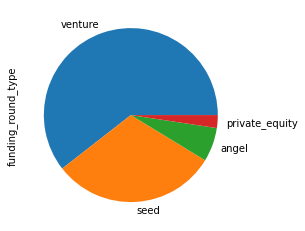

In [32]:
df_temp['funding_round_type'].value_counts().plot.pie()
plt.show()

### Spark Funds wants to invest between 5 to 15 million USD per investment round, venture investment type is the most suitable for them

In [33]:
master_frame = master_frame[master_frame.funding_round_type=="venture"]

# Checkpoint 3: Country Analysis

### Calculating total funding in different countries

In [34]:
top9= master_frame.pivot_table(index='country_code',values='raised_amount_usd',aggfunc='sum')
top9

,raised_amount_usd
country_code,
ARE,3.826175e+08
ARG,3.643388e+08
ARM,2.651750e+07
AUS,1.404029e+09
AUT,6.383607e+08
...,...
UKR,1.779246e+07
URY,1.983000e+07
USA,4.305230e+11


### Top nine countries which have received the highest total funding

In [35]:
top9=top9.sort_values('raised_amount_usd',ascending=False)[:9]

In [36]:
top9

,raised_amount_usd
country_code,
USA,4.305230e+11
CHN,4.185392e+10
GBR,2.119281e+10
IND,1.508651e+10
CAN,9.907218e+09
FRA,7.521851e+09
ISR,7.409350e+09
DEU,7.401922e+09
JPN,3.362647e+09


In [37]:
#the top three English-speaking countries are USA GBR and IND using https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language
cty=['USA','GBR','IND']
master_frame=master_frame[master_frame.country_code.isin(cty)]

In [38]:
master_frame.shape

(41283, 6)

## Checkpoint 4: Sector Analysis 1

### Importing mapping.csv in data frame named mapping

In [39]:
mapping= pd.read_csv("mapping.csv")

In [40]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [41]:
#understanding melt
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame: pandas.core.frame.DataFrame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None) -> pandas.core.frame.DataFrame
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it uses
        `

In [42]:
#list of relevent sectors
lst= list(mapping.columns[1:])
lst

['Automotive & Sports',
 'Blanks',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']

In [43]:
mapping=pd.melt(mapping,id_vars='category_list')

In [44]:
mapping

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
...,...,...,...
6187,Wholesale,"Social, Finance, Analytics, Advertising",0
6188,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6189,Wireless,"Social, Finance, Analytics, Advertising",0
6190,Women,"Social, Finance, Analytics, Advertising",0


In [45]:
mapping=mapping[mapping.value==1]

In [46]:
del mapping['value']

In [47]:
#renaming variable to main_sector
mapping=mapping.rename(columns={'variable':'main_sector'})

In [48]:
mapping

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [49]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [50]:
master_frame['primary_sector']=master_frame.category_list.map(lambda x: x.split("|")[0])

In [51]:
master_frame.head(20)

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,Media
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,venture,5000000.0,Application Platforms
5,/organization/004-technologies,004 Technologies,Software,USA,venture,5000000.0,Software
10,/organization/0xdata,H2O.ai,Analytics,USA,venture,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,Analytics,USA,venture,1700000.0,Analytics
12,/organization/0xdata,H2O.ai,Analytics,USA,venture,8900000.0,Analytics
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,USA,venture,5000000.0,Apps
28,/organization/10-minutes-with,10 Minutes With,Education,GBR,venture,4000000.0,Education
33,/organization/1000lookz,1000Lookz,Beauty,IND,venture,5000000.0,Beauty
34,/organization/1000memories,1000memories,Curated Web,USA,venture,2520000.0,Curated Web


### Merge master_frame and mapping so that all variables (columns) in the mapping frame are added to the master_frame data frame.

In [52]:
master_frame=pd.merge(master_frame,mapping,how='left',right_on='category_list',left_on='primary_sector')

In [53]:
master_frame

,permalink,name,category_list_x,country_code,funding_round_type,raised_amount_usd,primary_sector,category_list_y,main_sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,Media,Media,Entertainment
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,venture,5000000.0,Application Platforms,Application Platforms,"News, Search and Messaging"
2,/organization/004-technologies,004 Technologies,Software,USA,venture,5000000.0,Software,Software,Others
3,/organization/0xdata,H2O.ai,Analytics,USA,venture,20000000.0,Analytics,NaN,NaN
4,/organization/0xdata,H2O.ai,Analytics,USA,venture,1700000.0,Analytics,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41278,/organization/zyomyx-inc,ZYOMYX,Biotechnology,USA,venture,12000000.0,Biotechnology,Biotechnology,Cleantech / Semiconductors
41279,/organization/zyomyx-inc,ZYOMYX,Biotechnology,USA,venture,14219999.0,Biotechnology,Biotechnology,Cleantech / Semiconductors
41280,/organization/zyomyx-inc,ZYOMYX,Biotechnology,USA,venture,555016.0,Biotechnology,Biotechnology,Cleantech / Semiconductors
41281,/organization/zyrra,Zyrra,E-Commerce,USA,venture,140500.0,E-Commerce,E-Commerce,Others


In [54]:
del master_frame['category_list_y']
master_frame

,permalink,name,category_list_x,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,Media,Entertainment
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,venture,5000000.0,Application Platforms,"News, Search and Messaging"
2,/organization/004-technologies,004 Technologies,Software,USA,venture,5000000.0,Software,Others
3,/organization/0xdata,H2O.ai,Analytics,USA,venture,20000000.0,Analytics,NaN
4,/organization/0xdata,H2O.ai,Analytics,USA,venture,1700000.0,Analytics,NaN
...,...,...,...,...,...,...,...,...
41278,/organization/zyomyx-inc,ZYOMYX,Biotechnology,USA,venture,12000000.0,Biotechnology,Cleantech / Semiconductors
41279,/organization/zyomyx-inc,ZYOMYX,Biotechnology,USA,venture,14219999.0,Biotechnology,Cleantech / Semiconductors
41280,/organization/zyomyx-inc,ZYOMYX,Biotechnology,USA,venture,555016.0,Biotechnology,Cleantech / Semiconductors
41281,/organization/zyrra,Zyrra,E-Commerce,USA,venture,140500.0,E-Commerce,Others


In [55]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41283 entries, 0 to 41282
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           41283 non-null  object 
 1   name                41283 non-null  object 
 2   category_list_x     41283 non-null  object 
 3   country_code        41283 non-null  object 
 4   funding_round_type  41283 non-null  object 
 5   raised_amount_usd   41283 non-null  float64
 6   primary_sector      41283 non-null  object 
 7   main_sector         38431 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.8+ MB


In [56]:
master_frame.isnull().sum()

permalink                0
name                     0
category_list_x          0
country_code             0
funding_round_type       0
raised_amount_usd        0
primary_sector           0
main_sector           2852
dtype: int64

In [57]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink             0.00
name                  0.00
category_list_x       0.00
country_code          0.00
funding_round_type    0.00
raised_amount_usd     0.00
primary_sector        0.00
main_sector           6.91
dtype: float64

### Removing records which have missing sectors value beacuse we have to consider eight main sectors that are present in mapping

In [58]:
master_frame=master_frame[~master_frame.main_sector.isnull()]

# Checkpoint 5: Sector Analysis 2

#### Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. Using the three data frames, you can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.

In [59]:
D1= master_frame[(master_frame.country_code=='USA') & 
                 (master_frame.raised_amount_usd>=5000000) & (master_frame.raised_amount_usd<=15000000)]
D2= master_frame[(master_frame.country_code=='GBR') & 
                 (master_frame.raised_amount_usd>=5000000) & (master_frame.raised_amount_usd<=15000000)]
D3= master_frame[(master_frame.country_code=='IND') & 
                 (master_frame.raised_amount_usd>=5000000) & (master_frame.raised_amount_usd<=15000000)]

In [60]:
D3

,permalink,name,category_list_x,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,Media,Entertainment
8,/organization/1000lookz,1000Lookz,Beauty,IND,venture,5000000.0,Beauty,Health
59,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0,E-Commerce,Others
281,/organization/99games-online-private-limited,99Games Online Private Limited,Games,IND,venture,5000000.0,Games,Entertainment
339,/organization/abhinav-outsourcings-pvt-ltd,Abhinav Outsourcings Pvt. Ltd,Business Services|Outsourcing,IND,venture,5000000.0,Business Services,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...,...,...
41129,/organization/zoomcar-india,ZoomCar,Automotive|Consumers|E-Commerce|Transportation,IND,venture,8000000.0,Automotive,Automotive & Sports
41130,/organization/zoomcar-india,ZoomCar,Automotive|Consumers|E-Commerce|Transportation,IND,venture,11000000.0,Automotive,Automotive & Sports
41141,/organization/zoomo,Zoomo,Internet,IND,venture,5000000.0,Internet,"News, Search and Messaging"
41169,/organization/zopnow,ZopNow,Groceries|Logistics,IND,venture,10000000.0,Groceries,Manufacturing


## Country 1

#### Number of investment

In [61]:
D1.raised_amount_usd.count()

13044

#### total investment

In [62]:
D1.raised_amount_usd.sum()

109136524549.0

### Sector analysis for Country1

In [63]:
D1_sector=D1.pivot_table(values='raised_amount_usd',index='main_sector', aggfunc='count')

In [64]:
D1_sector.sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
main_sector,
Others,3373
Cleantech / Semiconductors,2561
"Social, Finance, Analytics, Advertising",2309
"News, Search and Messaging",1824
Health,1048
Manufacturing,989
Entertainment,712
Automotive & Sports,228


#### top three sectors for country 1

In [65]:
top3_D1= D1_sector.sort_values(by='raised_amount_usd',ascending=False)[0:3]
top3_D1['Country']="USA"
top3_D1

,raised_amount_usd,Country
main_sector,,
Others,3373,USA
Cleantech / Semiconductors,2561,USA
"Social, Finance, Analytics, Advertising",2309,USA


#### (top sector count-wise), company received the highest investment

In [66]:
D1_top_company=D1[D1.main_sector=='Others']
D1_top_company=D1_top_company.pivot_table(index='name',values='raised_amount_usd',aggfunc='sum')

top_sector_company=D1_top_company.sort_values(by='raised_amount_usd',ascending=False)

top_sector_company.head(1)


,raised_amount_usd
name,
Virtustream,64300000.0


### (second best sector count-wise), company received the highest investment

In [67]:
D1_top_company=D1[D1.main_sector=='Cleantech / Semiconductors']
D1_top_company=D1_top_company.pivot_table(index='name',values='raised_amount_usd',aggfunc='sum')

top_sector_company=D1_top_company.sort_values(by='raised_amount_usd',ascending=False)

top_sector_company.head(1)

,raised_amount_usd
name,
Quellan,82000000.0


## Country 2

#### Number of investment

In [68]:
D2.raised_amount_usd.count()

781

#### total investment

In [69]:
D2.raised_amount_usd.sum()

6048704358.0

### Sector analysis for Country2

In [70]:
D2_sector=D2.pivot_table(values='raised_amount_usd',index='main_sector', aggfunc='count')

In [71]:
D2_sector.sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
main_sector,
Others,207
Cleantech / Semiconductors,150
"Social, Finance, Analytics, Advertising",139
"News, Search and Messaging",97
Entertainment,78
Manufacturing,52
Health,32
Automotive & Sports,26


#### top 3 sectors for country 2

In [72]:
top3_D2= D2_sector.sort_values(by='raised_amount_usd',ascending=False)[0:3]
top3_D2['Country']='GBR'
top3_D2

,raised_amount_usd,Country
main_sector,,
Others,207,GBR
Cleantech / Semiconductors,150,GBR
"Social, Finance, Analytics, Advertising",139,GBR


#### (top sector count-wise), company received the highest investment

In [73]:
D2_top_company=D2[D2.main_sector=='Others']
D2_top_company=D2_top_company.pivot_table(index='name',values='raised_amount_usd',aggfunc='sum')

top_sector_company=D2_top_company.sort_values(by='raised_amount_usd',ascending=False)

top_sector_company.head(1)


,raised_amount_usd
name,
Electric Cloud,37000000.0


### (second best sector count-wise), company received the highest investment

In [74]:
D2_top_company=D2[D2.main_sector=='Cleantech / Semiconductors']
D2_top_company=D2_top_company.pivot_table(index='name',values='raised_amount_usd',aggfunc='sum')

top_sector_company=D2_top_company.sort_values(by='raised_amount_usd',ascending=False)

top_sector_company.head(1)

,raised_amount_usd
name,
EUSA Pharma,35600000.0


## Country 3

#### Number of investment

In [75]:
D3.raised_amount_usd.count()

444

#### total investment

In [76]:
D3.raised_amount_usd.sum()

3408537552.0

### Sector analysis for Country3

In [77]:
D3_sector=D3.pivot_table(values='raised_amount_usd',index='main_sector', aggfunc='count')

In [78]:
D3_sector.sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
main_sector,
Others,157
"News, Search and Messaging",76
"Social, Finance, Analytics, Advertising",59
Entertainment,46
Health,33
Manufacturing,30
Cleantech / Semiconductors,29
Automotive & Sports,14


#### top three sectors for company 3

In [79]:
top3_D3= D3_sector.sort_values(by='raised_amount_usd',ascending=False)[0:3]
top3_D3['Country']="IND"
top3_D3

,raised_amount_usd,Country
main_sector,,
Others,157,IND
"News, Search and Messaging",76,IND
"Social, Finance, Analytics, Advertising",59,IND


#### (top sector count-wise), company received the highest investment

In [80]:
D3_top_company=D3[D3.main_sector=='Others']
D3_top_company=D3_top_company.pivot_table(index='name',values='raised_amount_usd',aggfunc='sum')

top_sector_company=D3_top_company.sort_values(by='raised_amount_usd',ascending=False)

top_sector_company.head(1)


,raised_amount_usd
name,
FirstCry.com,39000000.0


### (second best sector count-wise), company received the highest investment

In [81]:
D3_top_company=D3[D3.main_sector=='News, Search and Messaging']
D3_top_company=D3_top_company.pivot_table(index='name',values='raised_amount_usd',aggfunc='sum')

top_sector_company=D3_top_company.sort_values(by='raised_amount_usd',ascending=False)

top_sector_company.head(1)


,raised_amount_usd
name,
GupShup,33000000.0


# Checkpoint 6: Plots

### plot showing the representative amount of investment in each funding type

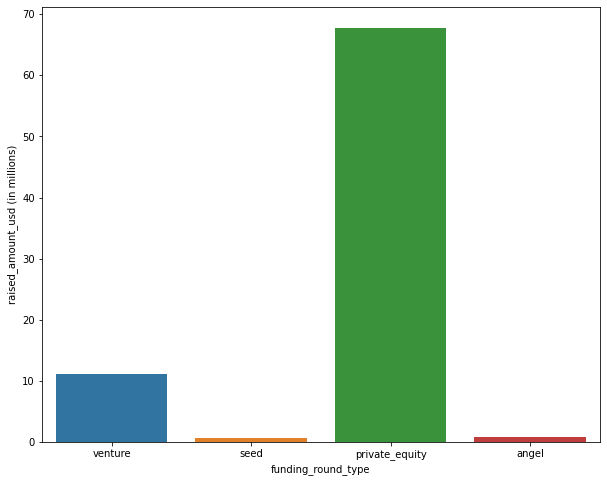

In [82]:
plt.figure(figsize=[10.0,8.0])
sns.barplot(x=df_temp['funding_round_type'],y=df_temp['raised_amount_usd']/1000000,estimator=np.mean,ci=None)
plt.ylabel("raised_amount_usd (in millions)")
plt.show()


### plot showing the top 9 countries against the total amount of investments of funding type venture

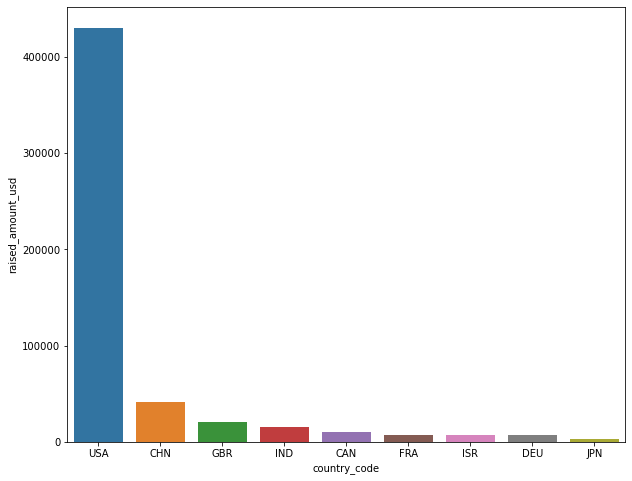

In [83]:
#storing top9 as data frame
top9=pd.DataFrame(top9.to_records())
plt.figure(figsize=[10,8])
sns.barplot(x=top9.country_code,y=top9.raised_amount_usd/1000000)
plt.show()

### plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart

In [84]:
sector_analysis=top3_D1.append(top3_D2).append(top3_D3)
#converting to data frame
sector_analysis= pd.DataFrame(sector_analysis.to_records())
sector_analysis

,main_sector,raised_amount_usd,Country
0,Others,3373,USA
1,Cleantech / Semiconductors,2561,USA
2,"Social, Finance, Analytics, Advertising",2309,USA
3,Others,207,GBR
4,Cleantech / Semiconductors,150,GBR
5,"Social, Finance, Analytics, Advertising",139,GBR
6,Others,157,IND
7,"News, Search and Messaging",76,IND
8,"Social, Finance, Analytics, Advertising",59,IND


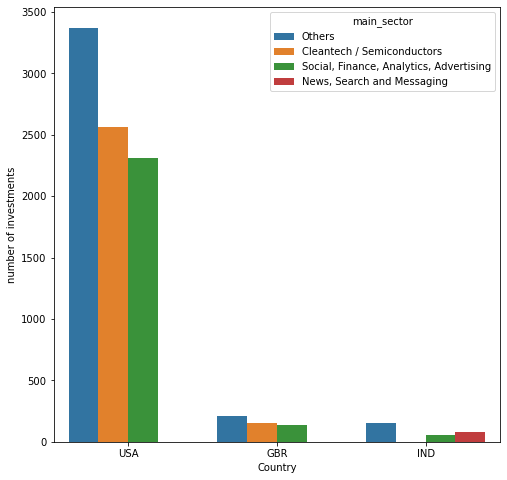

In [85]:
plt.figure(figsize=[8,8])
sns.barplot(x=sector_analysis.Country,y=sector_analysis.raised_amount_usd,hue=sector_analysis.main_sector)
plt.ylabel("number of investments")
plt.show()